# 线性回归

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
#生成数据
a = np.random.random((100,4))
b = np.random.randint(0,10,size=[100,4])
data = a + b
x = data[:,:1]
y = data[:,3:]
x_train = x[:-20]
x_test = x[-20:]
y_train = y[:-20].reshape((-1,1))
y_test = y[-20:].reshape((-1,1))
print( 'X_train=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)

X_train= (80,)
X_test= (20,)
y_train= (80, 1)
y_test= (20, 1)


In [86]:
class linear(object):
    def __init__(self):
        self.w = None
        self.b = None
    
    
    
    def loss(self,x,y):
        num_feature  = x.shape[1]
        num_train = x.shape[0]
        
        h = x.dot(self.w) + self.b
        loss = 0.5*np.sum(np.square(h - y)) / num_train
        
        dw = x.T.dot((h-y)) / num_train
        db = np.sum((h-y)) / num_train
        
        return loss,dw,db
       
        
        
    def train(self,x,y,learn_rate = 0.001,iters = 10000):
        num_feature = x.shape[1]
        self.w = np.zeros((num_feature,1))
        self.b = 0
        loss_list = []
        
        for i in range(iters):
            loss,dw,db = self.loss(x,y)
            loss_list.append(loss)
            self.w += -learn_rate*dw
            self.b += -learn_rate*db
            
            if i%500 == 0:
                print('iters = %d,loss = %f' % (i,loss))
        return loss_list
        
        
        
    def predict(self,x_test):
        y_pred = x.dot(self.w) + self.b
        return y_pred
    
    pass


In [87]:
##训练数据
classify = linear()
loss_list = classify.train(x_train,y_train) 
print(classify.w,classify.b)


start
iters = 0,loss = 17.980774
iters = 500,loss = 8.034638
iters = 1000,loss = 7.047237
iters = 1500,loss = 6.301592
iters = 2000,loss = 5.738513
iters = 2500,loss = 5.313298
iters = 3000,loss = 4.992194
iters = 3500,loss = 4.749709
iters = 4000,loss = 4.566594
iters = 4500,loss = 4.428314
iters = 5000,loss = 4.323890
iters = 5500,loss = 4.245034
iters = 6000,loss = 4.185485
iters = 6500,loss = 4.140516
iters = 7000,loss = 4.106557
iters = 7500,loss = 4.080913
iters = 8000,loss = 4.061547
iters = 8500,loss = 4.046923
iters = 9000,loss = 4.035880
iters = 9500,loss = 4.027540
end
[[-0.15307404]] 5.843664103322558


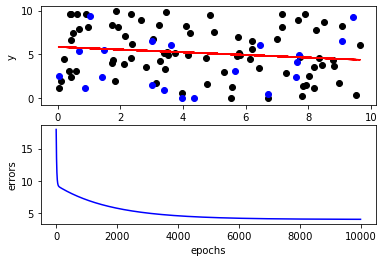

In [88]:
import matplotlib.pyplot as plt
f = x_train.dot(classify.w) + classify.b
fig = plt.figure()
plt.subplot(211)
plt.scatter(x_train,y_train,color = 'black')
plt.scatter(x_test,y_test,color = 'blue')
plt.plot(x_train,f,color = 'red')
plt.xlabel('x')
plt.ylabel('y')
 
plt.subplot(212)
plt.plot(loss_list,color = 'blue')
plt.xlabel('epochs')
plt.ylabel('errors')
plt.show()
